# CambridgeSpark Portfolio Project by Erdi Ozyurt (Starting Date:30/11/23)


# INTRODUCTION
The Olist Store dataset is a valuable information collection encompassing 100,000 orders placed on an e-commerce platform in Brazil. This dataset provides insights into the operations of the Olist Store, covering a period from 2016 to 2018.

Download link:https://www.kaggle.com/datasets/erak1006/brazilian-e-commerce-company-olist

In this project, I’m assigned to explore, clean, and analyze Olist’s E-commerce Public Dataset. In addition, to help Olist gain better business insights into its e-commerce platform and optimize the opportunities available for growth, we will define business-related objectives, thus providing insights and recommendations

# Data Schemas

The Olist Store dataset is structured as a relational database, with multiple tables that are interconnected to provide a comprehensive view of the e-commerce operations.
Data Schemas Entity-Relationship (ER) diagram shown below:

In [1]:
from IPython.display import Image

# Replace 'image_url_here' with the actual URL of the image you want to display
image_url = 'https://i.imgur.com/HRhd2Y0.png'

# Display the image from the URL
display(Image(url=image_url))


Plan A: using SQL enviorment however I will focus this in a different jupiter notebook

Plan B: Uploading Csv files seperately and carry out analysis on different dfs.

# Plan B
## 1.Data Exploratory and Cleaning

In [2]:
#Libraries Import
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install google_trans_new
!pip install scikit-learn
!pip install mtranslate
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
nltk.download('punkt')  
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erdio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erdio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 1.1. Customers data as cust_df

In [3]:
# import dataset
cust_df = pd.read_csv("olist_customers_dataset.csv")
cust_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
#DataFramesummary
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


The olist_customers_dataset contains location informations of the customer.

customer_unique_id is a unique id identifying customers in the system. It is an id generated at the time of signup.
customer_id is a temporary id generated everytime the customer places an order.

In [5]:
def dataframe_summary(df):
    
    print("Rows:", df.shape[0], "Columns:", df.shape[1])
# determine the number of unique values in each column
    print("\nNumber of unique values in each column:")
    print(df.nunique(axis=0))

# determine the number of null values
    print("\nNumber of NULL values in each column:")
    print(df.isna().sum())

In [6]:
#Data Frame Summary for unique values and Null values breakdown
dataframe_summary(cust_df)

Rows: 99441 Columns: 5

Number of unique values in each column:
customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

Number of NULL values in each column:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


### 1.2 Sellers data as seller_df

In [7]:
# import dataset
seller_df = pd.read_csv("olist_sellers_dataset.csv")

# view dataset
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


The olist_sellers_dataset contains locations information of the sellers in terms of zip code, city and state. 

In [8]:
#Info
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [9]:
#Data Frame Summary for unique values and Null values breakdown
dataframe_summary(seller_df)

Rows: 3095 Columns: 4

Number of unique values in each column:
seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

Number of NULL values in each column:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


### 1.3 Geolocation data as geo_df1

In [10]:
# import dataset
geo_df = pd.read_csv('olist_geolocation_dataset.csv')

# view dataset
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
#Data Frame Summary for unique values and Null values breakdown
dataframe_summary(geo_df)

Rows: 1000163 Columns: 5

Number of unique values in each column:
geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

Number of NULL values in each column:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [12]:
geo_df['geolocation_zip_code_prefix'].value_counts().to_frame().describe()

,geolocation_zip_code_prefix
count,19015.000000
mean,52.598633
std,72.057907
min,1.000000
25%,10.000000
50%,29.000000
75%,66.500000
max,1146.000000


In [13]:
# Define the ranges for latitude and longitude for Brazil
min_lat, max_lat = -33.75, 5.25
min_long, max_long = -74.00, -34.75

# Filter the DataFrame to include only coordinates within the defined ranges
geo_df1 = geo_df[
    (geo_df['geolocation_lat'] >= min_lat) & (geo_df['geolocation_lat'] <= max_lat) &
    (geo_df['geolocation_lng'] >= min_long) & (geo_df['geolocation_lng'] <= max_long)
].copy()  # Use .copy() to create a new DataFrame

# Show the first few rows of the filtered DataFrame
print(geo_df1.head())

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  


In [14]:
#had diffuculties when I tried to upload and I added this line for confirmation

# Check if the file exists at the specified path
file_path = r'C:\Users\erdio\OneDrive\Desktop\Brazil\bra_admbnda_adm0_ibge_2020.shp'

if os.path.exists(file_path):
    print("File exists at the specified path.")
else:
    print("File does not exist at the specified path.")


File exists at the specified path.


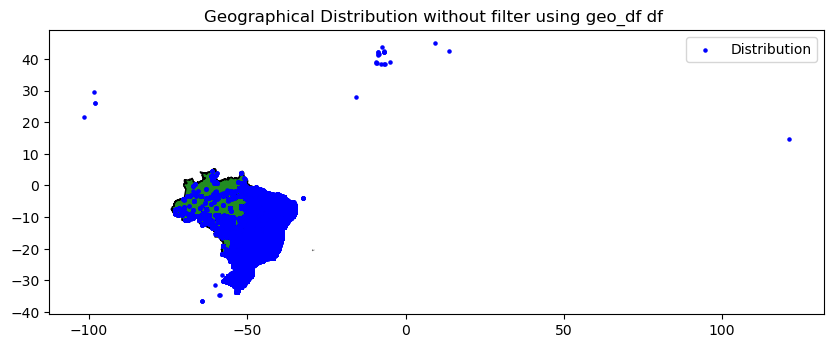

In [15]:
# Read the shapefile containing Brazil's boundaries
brazil_shapefile_path = r'C:\Users\erdio\OneDrive\Desktop\Brazil\bra_admbnda_adm0_ibge_2020.shp'
brazil = gpd.read_file(brazil_shapefile_path)

# Assuming geo_df has 'geolocation_lat' and 'geolocation_lng' columns
# Create a GeoDataFrame from geo_df
geometry = gpd.points_from_xy(geo_df['geolocation_lng'], geo_df['geolocation_lat'])
geo_df_gdf = gpd.GeoDataFrame(geo_df, geometry=geometry)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
brazil.plot(ax=ax, color='forestgreen', edgecolor='black')  # Plot Brazil's boundaries
geo_df_gdf.plot(ax=ax, marker='o', color='blue', markersize=5, label='Distribution') 
# Plot geo_df data
plt.title('Geographical Distribution without filter using geo_df df ')
plt.legend()
plt.show()


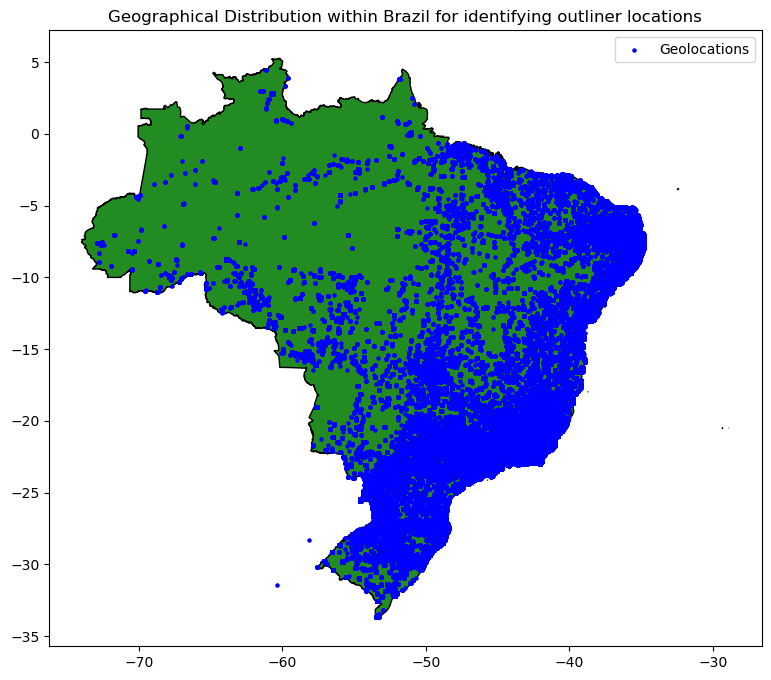

In [16]:
# Read the shapefile containing Brazil's boundaries
brazil_shapefile_path = r'C:\Users\erdio\OneDrive\Desktop\Brazil\bra_admbnda_adm0_ibge_2020.shp'
brazil = gpd.read_file(brazil_shapefile_path)

# Create a GeoDataFrame from geo_df1
geometry = gpd.points_from_xy(geo_df1['geolocation_lng'], geo_df1['geolocation_lat'])
geo_df1_gdf = gpd.GeoDataFrame(geo_df1, geometry=geometry)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
brazil.plot(ax=ax, color='forestgreen', edgecolor='black')  

# Plot Brazil's boundaries
geo_df1_gdf.plot(ax=ax, marker='o', color='blue', markersize=5, label='Geolocations')  
# Plot geo_df1 data

plt.title('Geographical Distribution within Brazil for identifying outliner locations')
plt.legend()
plt.show()

Still some outliners however it is fine by me :)

In [17]:
geo_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000121 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000121 non-null  int64  
 1   geolocation_lat              1000121 non-null  float64
 2   geolocation_lng              1000121 non-null  float64
 3   geolocation_city             1000121 non-null  object 
 4   geolocation_state            1000121 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 45.8+ MB


### 1.4 Order items data as order_items_df

In [18]:
# import dataset
order_items_df = pd.read_csv('olist_order_items_dataset.csv')

# view dataset
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [19]:
#summary of df
dataframe_summary(order_items_df)

Rows: 112650 Columns: 7

Number of unique values in each column:
order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

Number of NULL values in each column:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


The olist_order_items_dataset contains IDs of the order, order item, product, & seller. Also contains shipping limit date, price, and freight value.

### 1.5 Orders data as orders_df

In [20]:
# import dataset
orders_df = pd.read_csv('olist_orders_dataset.csv')

# view dataset
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [21]:
#Summary of the orders_df
dataframe_summary(orders_df)

Rows: 99441 Columns: 8

Number of unique values in each column:
order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

Number of NULL values in each column:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [22]:
# Dropping null values from the entire DataFrame
orders_df.dropna(inplace=True)

# Checking the number of null values after dropping
print(orders_df.isnull().sum())


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


### 1.6 Order Reviews as reviews_df

In [23]:

# "review_creation_date" and "review_answer_timestamp" columns.
parse_dates = ['review_creation_date', 'review_answer_timestamp']
reviews_df = pd.read_csv("olist_order_reviews_dataset.csv",\
                                 infer_datetime_format = True, parse_dates = parse_dates, encoding='latin-1')

# Drop duplicates from review_id column.
reviews_df.drop_duplicates(subset = ['review_id'], inplace = True)

# Preview the first 5 lines of the loaded data 
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,ParabÃ©ns lojas lannister adorei comprar pela ...,2018-03-01,2018-03-02 10:26:53


In [24]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98410 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                98410 non-null  object        
 1   order_id                 98410 non-null  object        
 2   review_score             98410 non-null  int64         
 3   review_comment_title     11519 non-null  object        
 4   review_comment_message   40668 non-null  object        
 5   review_creation_date     98410 non-null  datetime64[ns]
 6   review_answer_timestamp  98410 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 6.0+ MB


In [25]:
#summary of df
dataframe_summary(reviews_df)

Rows: 98410 Columns: 7

Number of unique values in each column:
review_id                  98410
order_id                   98167
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

Number of NULL values in each column:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       86891
review_comment_message     57742
review_creation_date           0
review_answer_timestamp        0
dtype: int64


Ignoring the Null values at this stage because they are on the comment tittle and message.Planning to focus more review score at the begining.

In [26]:
# Change column to datetime
reviews_df['review_answer_timestamp'] = reviews_df['review_answer_timestamp'].dt.date

# Check data info
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98410 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                98410 non-null  object        
 1   order_id                 98410 non-null  object        
 2   review_score             98410 non-null  int64         
 3   review_comment_title     11519 non-null  object        
 4   review_comment_message   40668 non-null  object        
 5   review_creation_date     98410 non-null  datetime64[ns]
 6   review_answer_timestamp  98410 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 6.0+ MB


In [27]:
# Change column to datetime
reviews_df['review_answer_timestamp'] = pd.to_datetime(reviews_df['review_answer_timestamp'])

# Print dataframe
reviews_df.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

In [28]:
# Separating the titles and reviews and dropping the missing rows separately so that there is equal number of rows
reviews_data_title = reviews_df['review_comment_title']
reviews_data = reviews_df.drop(['review_comment_title'],axis=1)

# Dropping NaN values
reviews_data  = reviews_data.dropna()
reviews_data_title = reviews_data_title.dropna()

# Resetting the reviews index and visualizing the data
reviews_data = reviews_data.reset_index(drop=True)
reviews_data.shape
reviews_data_title.shape

(11519,)

In [29]:

comments = []
stop_words = set(stopwords.words('portuguese'))

for words in reviews_data['review_comment_message']:
    only_letters = re.sub("[^a-zA-Z]", " ", words)
    tokens = nltk.word_tokenize(only_letters)  # Tokenize the sentences
    lower_case = [l.lower() for l in tokens]  # Convert all letters to lower case
    filtered_result = [l for l in lower_case if l not in stop_words]  # Remove stopwords from the comments
    comments.append(' '.join(filtered_result))


In [30]:
#Sadly I Can not speak or understand this language and I am using m translate for English Support?
import mtranslate  
# Import the mtranslate module

# Using CountVectorizer to get the most important trigrams
co = CountVectorizer(ngram_range=(3, 3))
counts = co.fit_transform(comments)
important_trigrams = pd.DataFrame(counts.sum(axis=0), columns=co.get_feature_names_out()).T.sort_values(0, ascending=False).head(50)

# Reset the index, rename the columns
important_trigrams = important_trigrams.reset_index()
important_trigrams.rename(columns={'index': 'trigrams', 0: 'frequency'}, inplace=True)

# Apply translation using the mtranslate package
important_trigrams['english_translation'] = important_trigrams['trigrams'].apply(lambda x: mtranslate.translate(x, 'en'))
important_trigrams


,trigrams,frequency,english_translation
0,chegou antes prazo,1102,arrived before deadline
1,bem antes prazo,705,well before the deadline
2,entregue antes prazo,606,delivered before deadline
3,produto chegou antes,445,product arrived early
4,entrega antes prazo,428,delivery before deadline
5,chegou bem antes,416,arrived well before
6,produto entregue antes,372,product delivered before
7,entrega super pida,296,super fast delivery
8,antes prazo previsto,287,before expected deadline
9,produto tima qualidade,256,great quality product


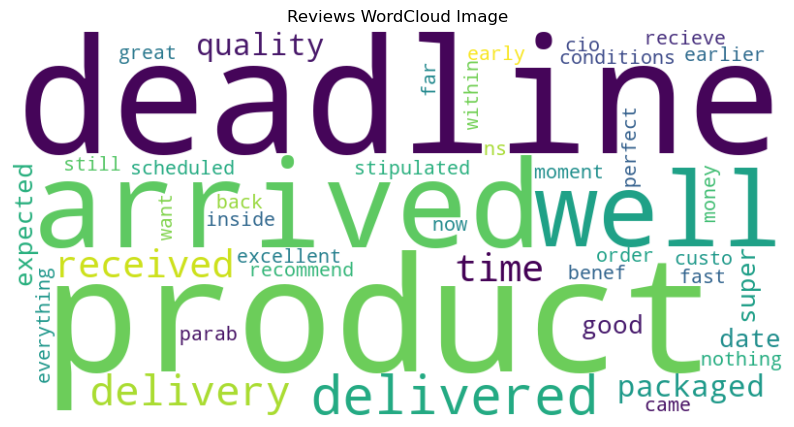

In [31]:
# Concatenate all translated texts into a single string
text_combined = ' '.join(important_trigrams['english_translation'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Reviews WordCloud Image')
plt.show()


In [32]:
# Processing the reviews titles data
comments_titles = []
stop_words = set(stopwords.words('portuguese'))

for words in reviews_data_title:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = nltk.word_tokenize(only_letters) # Tokenize the sentences
    lower_case = [l.lower() for l in tokens] # Convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) # Remove stopwords from the comments
    
    comments_titles.append(' '.join(filtered_result))

In [33]:
# Using CountVectorizer to get the most important trigrams
co = CountVectorizer(ngram_range=(3,3))
counts = co.fit_transform(comments_titles)
important_trigrams_title = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0,ascending=False).head(50)

important_trigrams_title=important_trigrams_title.reset_index()
important_trigrams_title.rename(columns={'index':'trigrams_title',0:'frequency'},inplace=True)

# Apply translation using the mtranslate package
important_trigrams_title['english_translation'] = important_trigrams_title['trigrams_title'].apply(lambda x: mtranslate.translate(x, 'en'))
important_trigrams_title

,trigrams_title,frequency,english_translation
0,entrega super pida,27,super fast delivery
1,entrega antes prazo,15,delivery before deadline
2,custo benef cio,12,custo benef cio
3,nao recebi produto,11,I did not recieve the product
4,chegou antes prazo,11,arrived before deadline
5,produto boa qualidade,8,good quality product
6,produto entregue prazo,8,product delivered on time
7,produto veio defeito,7,product came defective
8,produto veio errado,6,product came wrong
9,produto nao entregue,6,product not delivered


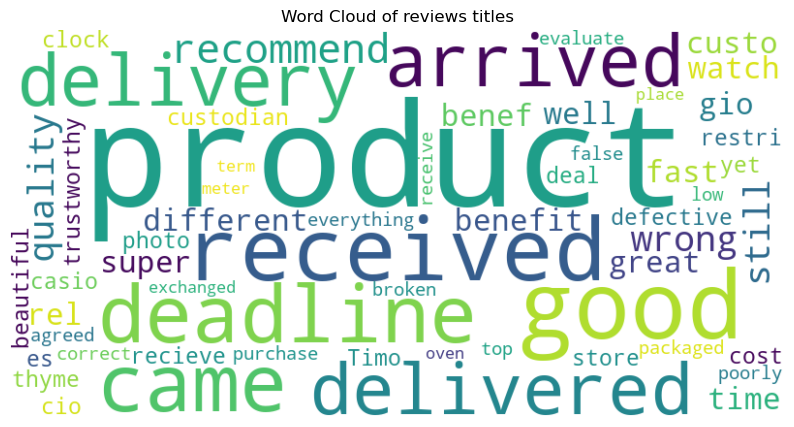

In [34]:
#Word Cloud of reviews titles

# Concatenate all translated texts into a single string
text_combined = ' '.join(important_trigrams_title['english_translation'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud of reviews titles')
plt.show()


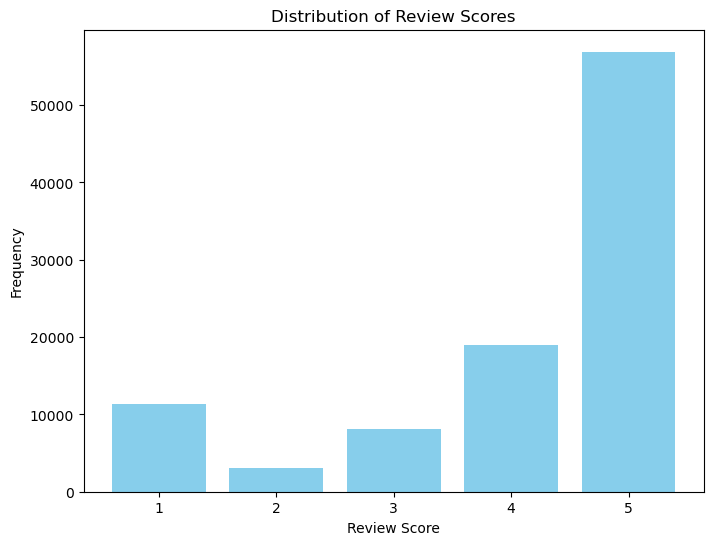

In [35]:
# Distribution of Review Scores

# Count the occurrences of each score
score_counts = reviews_df['review_score'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(score_counts.index, score_counts.values, color='skyblue')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.title('Distribution of Review Scores')
plt.xticks(score_counts.index)  # Set x-ticks to display all scores
plt.show()


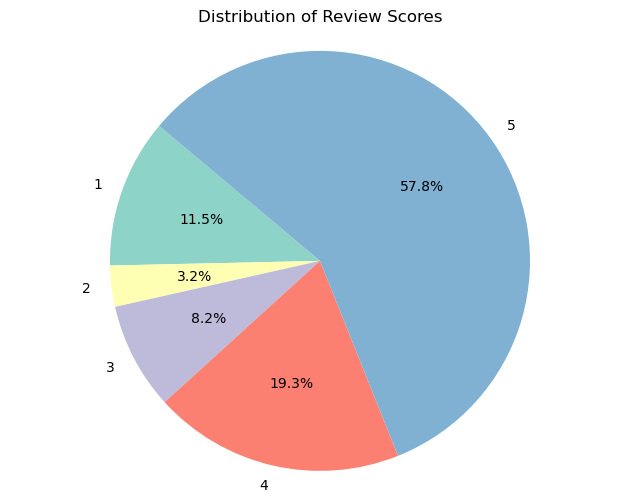

In [36]:
#Chart of Percentage of Reviews

# Count the occurrences of each score
score_counts = reviews_df['review_score'].value_counts().sort_index()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Review Scores')
plt.show()


### 1.7 Order Payments as payments_df

In [37]:
# Read in olist_order_payments_dataset.csv and make pandas dataframe
payments_df = pd.read_csv("olist_order_payments_dataset.csv")

# Print dataframe
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [38]:
# Check datatypes
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [39]:
# Count rows of each column
payments_df.count()

order_id                103886
payment_sequential      103886
payment_type            103886
payment_installments    103886
payment_value           103886
dtype: int64

In [40]:
# Count rows of each column
payments_df.shape

(103886, 5)

In [41]:
# Count number of unique entries and check for null values
dataframe_summary(payments_df)

Rows: 103886 Columns: 5

Number of unique values in each column:
order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

Number of NULL values in each column:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


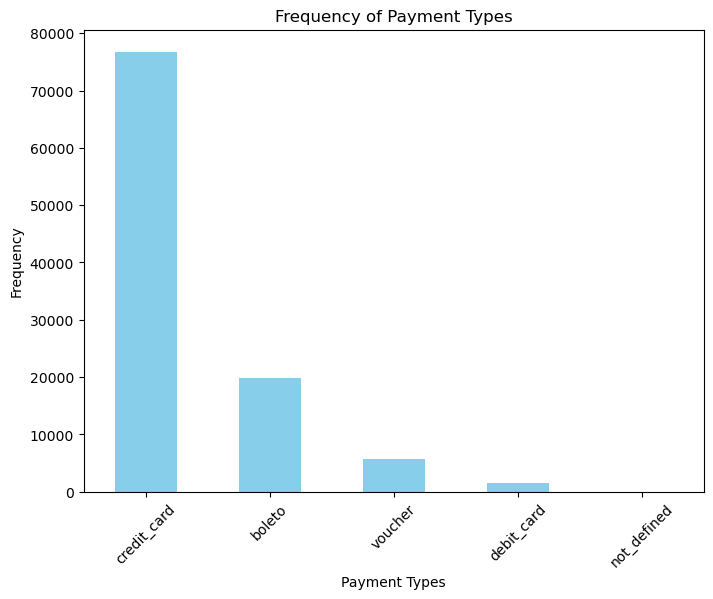

In [42]:
#Frequency of Payment Types Chart

# Count the occurrences of each payment type
payment_type_counts = payments_df['payment_type'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
payment_type_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Payment Types')
plt.ylabel('Frequency')
plt.title('Frequency of Payment Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()


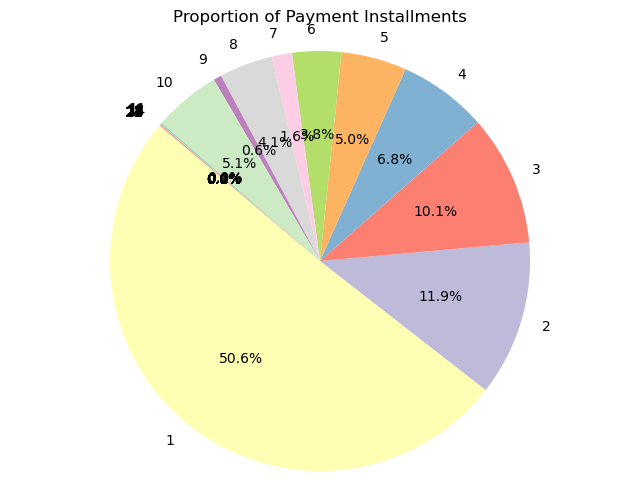

In [43]:
#Proportion of Payment Installments

# Count the occurrences of each payment installment
payment_installments_counts = payments_df['payment_installments'].value_counts().sort_index()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(payment_installments_counts, labels=payment_installments_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Proportion of Payment Installments')
plt.show()


C:\Users\erdio\AppData\Local\Temp\ipykernel_1700\1666721681.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(payments_df['payment_value'], shade=True, color='lightblue')


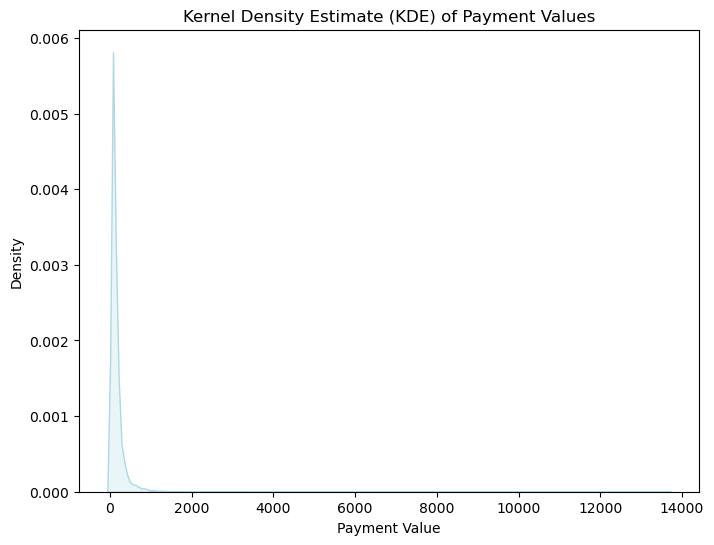

In [45]:
#KDE of Payment Values
# Create a KDE plot for payment values
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.kdeplot(payments_df['payment_value'], shade=True, color='lightblue')
plt.xlabel('Payment Value')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) of Payment Values')
plt.show()


In [46]:
# Calculate minimum, maximum, and average (mean) values of payment values
min_payment = payments_df['payment_value'].min()
max_payment = payments_df['payment_value'].max()
avg_payment = payments_df['payment_value'].mean()

print(f"Minimum payment value: {min_payment}")
print(f"Maximum payment value: {max_payment}")
print(f"Average payment value: {avg_payment}")


Minimum payment value: 0.0
Maximum payment value: 13664.08
Average payment value: 154.10038041699553


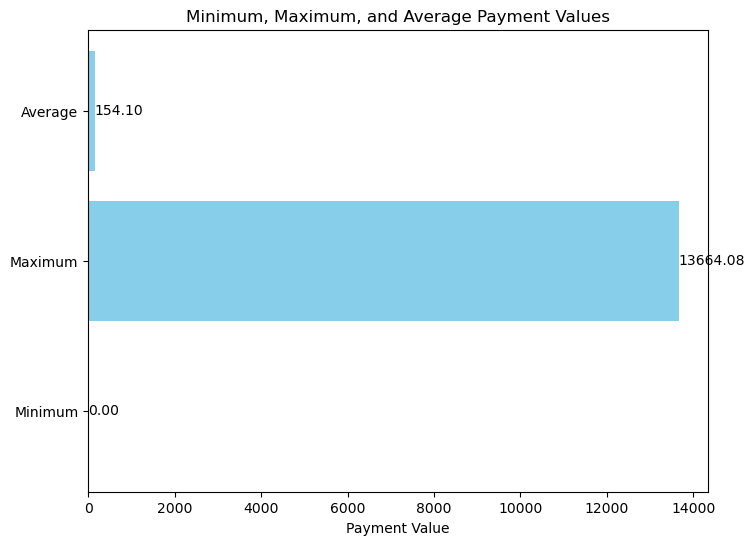

In [47]:

# Calculate minimum, maximum, and average payment values
min_payment = payments_df['payment_value'].min()
max_payment = payments_df['payment_value'].max()
avg_payment = payments_df['payment_value'].mean()

# Create lists for plotting
values = [min_payment, max_payment, avg_payment]
labels = ['Minimum', 'Maximum', 'Average']

# Create a horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel('Payment Value')
plt.title('Minimum, Maximum, and Average Payment Values')
for i, v in enumerate(values):
    plt.text(v, i, f'{v:.2f}', color='black', va='center')  # Display the values on bars
plt.show()


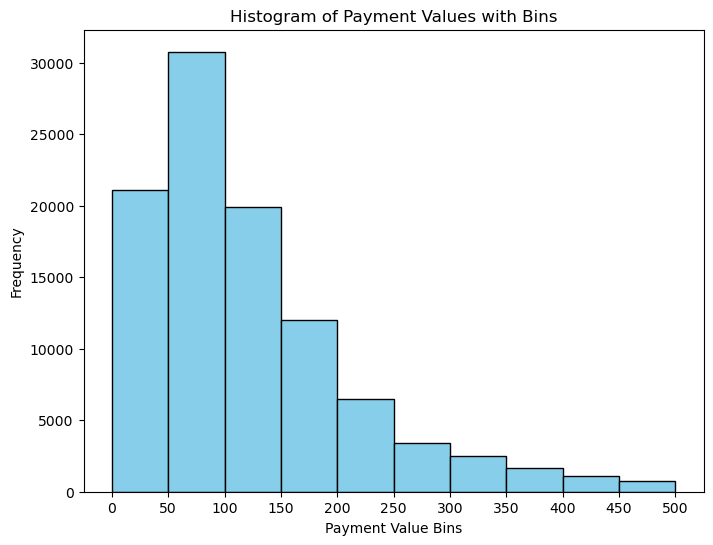

In [48]:
#Chart with Payment Value Bins
# Define bins for payment values
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Create a histogram with specified bins
plt.figure(figsize=(8, 6))
plt.hist(payments_df['payment_value'], bins=bins, color='skyblue', edgecolor='black')
plt.xlabel('Payment Value Bins')
plt.ylabel('Frequency')
plt.title('Histogram of Payment Values with Bins')
plt.xticks(bins)  # Set x-ticks to display bin edges
plt.show()


### 1.8 Product category name data as product_df

In [49]:
# import dataset
product_df = pd.read_csv("olist_products_dataset2.csv")

# view dataset
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [50]:
dataframe_summary(product_df)

Rows: 32951 Columns: 9

Number of unique values in each column:
product_id                    32951
product_category_name            71
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

Number of NULL values in each column:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


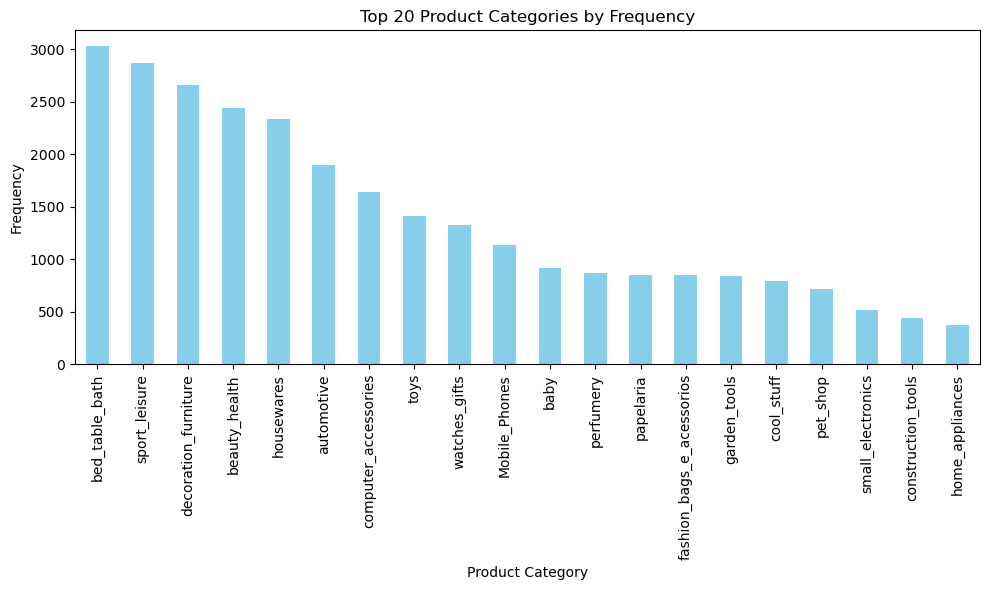

In [51]:
#top 20 Products

# Count the occurrences of each product category
category_counts = product_df['product_category_name'].value_counts()

# Select top 20 product categories by frequency
top_20_categories = category_counts.head(20)

# Create a bar chart for top 20 categories
plt.figure(figsize=(10, 6))
top_20_categories.plot(kind='bar', color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Top 20 Product Categories by Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()


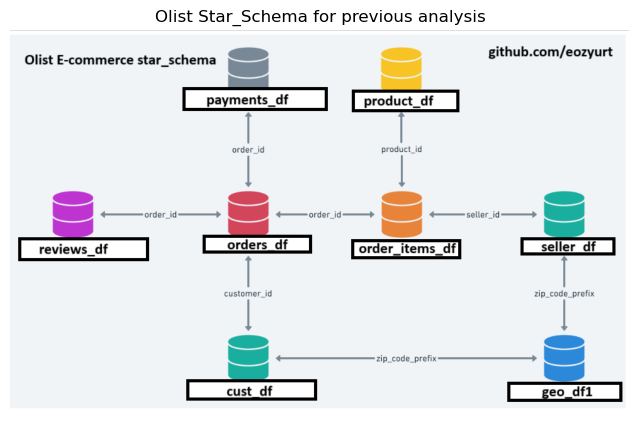

In [52]:
# Final Schema with Df names for joins for future referance
file_path = "Olist E-commerce star_schema.png"

# Load the image using Matplotlib
img = plt.imread(file_path)

# Display the image using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')  # Hide axis values and ticks
plt.title('Olist Star_Schema for previous analysis')
plt.show()


# PART 2 Deep Dive & Merge the dfs

In [53]:
#First step;Orders_df & order_item_df with 'order_id'
df_merged = pd.merge(orders_df, order_items_df, on='order_id')
#Second step;merged & cust_df with 'customer_id'
df_merged = pd.merge(df_merged, cust_df, on='customer_id')
#Third step ; merged & product_df with 'product_id'
df_merged = pd.merge(df_merged, product_df, on='product_id')
#Forth step; merged & seller_df, on='seller_id'
df_merged = pd.merge(df_merged, seller_df, on='seller_id')


In [54]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110180 entries, 0 to 110179
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110180 non-null  object 
 1   customer_id                    110180 non-null  object 
 2   order_status                   110180 non-null  object 
 3   order_purchase_timestamp       110180 non-null  object 
 4   order_approved_at              110180 non-null  object 
 5   order_delivered_carrier_date   110180 non-null  object 
 6   order_delivered_customer_date  110180 non-null  object 
 7   order_estimated_delivery_date  110180 non-null  object 
 8   order_item_id                  110180 non-null  int64  
 9   product_id                     110180 non-null  object 
 10  seller_id                      110180 non-null  object 
 11  shipping_limit_date            110180 non-null  object 
 12  price                         

In [55]:
# Look at the statistical summary of the data
df_merged.describe()

,order_item_id,price,freight_value,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,110180.000000,110180.000000,110180.000000,110180.000000,108644.000000,108644.000000,108644.000000,110162.000000,110162.000000,110162.000000,110162.000000,110180.000000
mean,1.198212,119.976817,19.948713,35155.850826,48.807794,787.320496,2.210817,2089.490868,30.141528,16.555464,22.985494,24468.323280
std,0.706726,182.309380,15.699220,29901.214959,10.008592,651.343742,1.721829,3741.366587,16.122188,13.409553,11.687560,27624.170936
min,1.000000,0.850000,0.000000,1003.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,1.000000,39.900000,13.080000,11310.000000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000
50%,1.000000,74.900000,16.260000,24344.000000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13568.000000
75%,1.000000,134.170000,21.150000,59066.000000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28035.000000
max,21.000000,6735.000000,409.680000,99980.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000


C:\Users\erdio\AppData\Local\Temp\ipykernel_1700\3302471377.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_merged.corr(), cmap='coolwarm')


<Axes: >

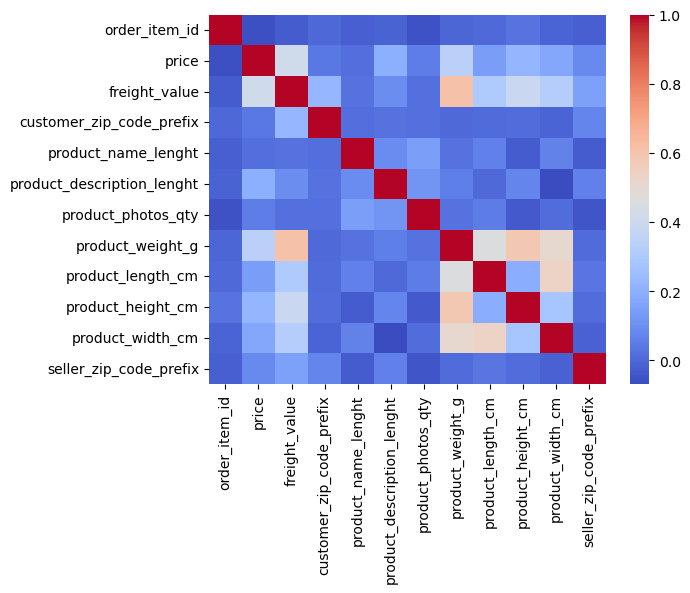

In [57]:


# Assuming df_merged is the DataFrame you want to visualize the correlation heatmap for
sns.heatmap(df_merged.corr(), cmap='coolwarm')


<Axes: xlabel='avg_order_value', ylabel='purchase_frequency'>

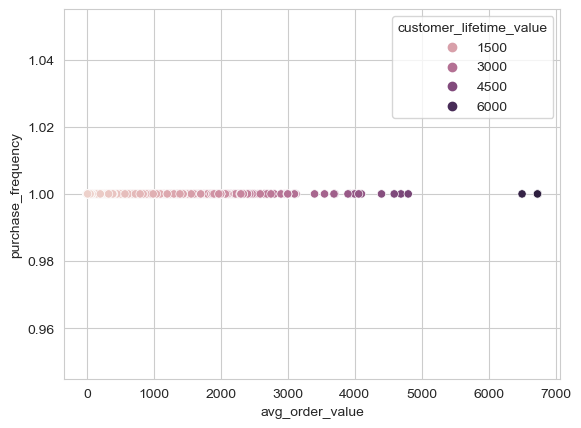

In [61]:
#Perform feature engineering to do some customer analysis
# Calculate the frequency of purchase for each customer
cust_df['purchase_date'] = pd.to_datetime(df_merged['order_purchase_timestamp']).dt.date
cust_df = cust_df.groupby('customer_id')['purchase_date'].nunique().reset_index()
cust_df = cust_df.rename(columns={'purchase_date': 'purchase_frequency'})

# Group the data by customer ID and calculate average order value
cust_df = pd.merge(cust_df, df_merged.groupby('customer_id')['price'].mean().reset_index(), on='customer_id')
cust_df = cust_df.rename(columns={'price': 'avg_order_value'})

# Calculate customer lifetime value
cust_df['total_revenue'] = df_merged.groupby('customer_id')['price'].sum().reset_index()['price']
cust_df['customer_lifetime_value'] = cust_df['avg_order_value'] * cust_df['purchase_frequency']
sns.scatterplot(x='avg_order_value', y='purchase_frequency', data=cust_df, hue='customer_lifetime_value')

In [68]:


# Convert timestamp columns to datetime objects for time-based analysis
timestamp_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in timestamp_columns:
    df_merged[col] = pd.to_datetime(df_merged[col])

# Analyzing purchase frequency
purchase_frequency = df_merged.groupby('customer_id')['order_id'].count().reset_index()
average_purchase_frequency = purchase_frequency['order_id'].mean()

# Identifying preferred categories
preferred_categories = df_merged.groupby('customer_id')['product_category_name'].agg(lambda x:x.value_counts().index[0] if x.count() else None).reset_index()

# Customer location analysis
customer_locations = df_merged.groupby('customer_state')['customer_id'].count().reset_index()
customer_locations = customer_locations.sort_values(by='customer_id', ascending=False)

# Time taken for delivery
df_merged['delivery_time'] = df_merged['order_delivered_customer_date'] - df_merged['order_purchase_timestamp']
average_delivery_time = df_merged['delivery_time'].mean()

# Displaying results
print(f"Average purchase frequency per customer: {average_purchase_frequency}")
print(f"Preferred categories for each customer:\n{preferred_categories}")
print(f"Customer locations:\n{customer_locations}")
print(f"Average delivery time: {average_delivery_time}")


Average purchase frequency per customer: 1.1422232819481448
Preferred categories for each customer:
                            customer_id  product_category_name
0      00012a2ce6f8dcda20d059ce98491703                   toys
1      000161a058600d5901f007fab4c27140          beauty_health
2      0001fd6190edaaf884bcaf3d49edf079                   baby
3      0002414f95344307404f0ace7a26f1d5             cool_stuff
4      000379cdec625522490c315e70c7a9fb         bed_table_bath
...                                 ...                    ...
96456  fffcb937e9dd47a13f05ecb8290f4d3e  general_interest_book
96457  fffecc9f79fd8c764f843e9951b11341         bed_table_bath
96458  fffeda5b6d849fbd39689bb92087f431          Mobile_Phones
96459  ffff42319e9b2d713724ae527742af25         bed_table_bath
96460  ffffa3172527f765de70084a7e53aae8   decoration_furniture

[96461 rows x 2 columns]
Customer locations:
   customer_state  customer_id
25             SP        46437
18             RJ        14143
10   

### 2.2 Customer Behavior Analysis

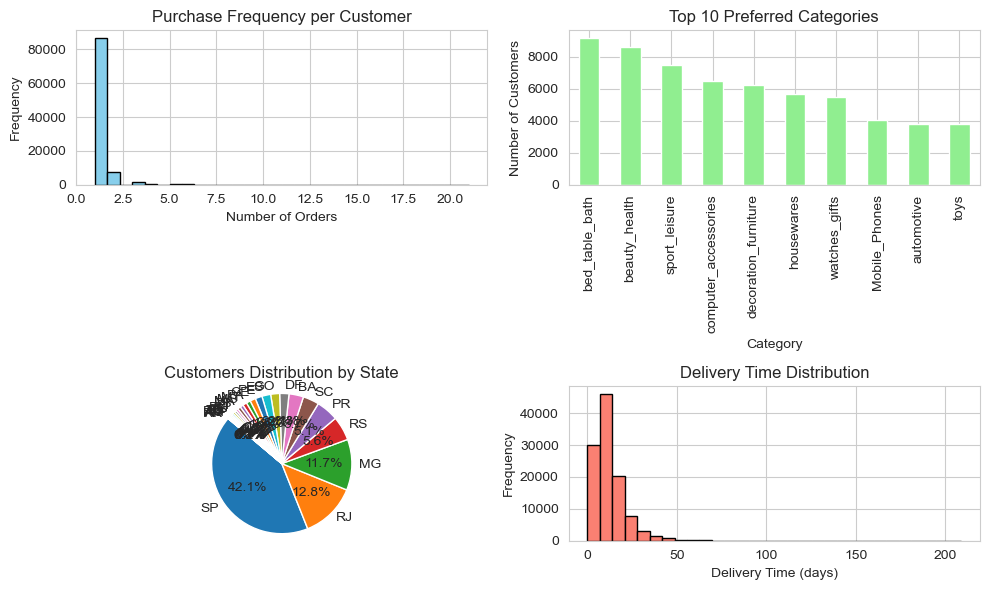

Average purchase frequency per customer: 1.1422232819481448
Preferred categories for each customer:
                            customer_id  product_category_name
0      00012a2ce6f8dcda20d059ce98491703                   toys
1      000161a058600d5901f007fab4c27140          beauty_health
2      0001fd6190edaaf884bcaf3d49edf079                   baby
3      0002414f95344307404f0ace7a26f1d5             cool_stuff
4      000379cdec625522490c315e70c7a9fb         bed_table_bath
...                                 ...                    ...
96456  fffcb937e9dd47a13f05ecb8290f4d3e  general_interest_book
96457  fffecc9f79fd8c764f843e9951b11341         bed_table_bath
96458  fffeda5b6d849fbd39689bb92087f431          Mobile_Phones
96459  ffff42319e9b2d713724ae527742af25         bed_table_bath
96460  ffffa3172527f765de70084a7e53aae8   decoration_furniture

[96461 rows x 2 columns]
Customer locations:
   customer_state  customer_id
25             SP        46437
18             RJ        14143
10   

In [69]:
# Convert timestamp columns to datetime objects for time-based analysis
timestamp_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in timestamp_columns:
    df_merged[col] = pd.to_datetime(df_merged[col])

# Analyzing purchase frequency
purchase_frequency = df_merged.groupby('customer_id')['order_id'].count().reset_index()
average_purchase_frequency = purchase_frequency['order_id'].mean()

# Identifying preferred categories
preferred_categories = df_merged.groupby('customer_id')['product_category_name'].agg(lambda x: x.value_counts().index[0] if x.count() else None).reset_index()

# Customer location analysis
customer_locations = df_merged.groupby('customer_state')['customer_id'].count().reset_index()
customer_locations = customer_locations.sort_values(by='customer_id', ascending=False)

# Time taken for delivery
df_merged['delivery_time'] = (df_merged['order_delivered_customer_date'] - df_merged['order_purchase_timestamp']).dt.days
average_delivery_time = df_merged['delivery_time'].mean()

# Visualizations
plt.figure(figsize=(10, 6))

# Purchase frequency histogram
plt.subplot(2, 2, 1)
plt.hist(purchase_frequency['order_id'], bins=30, color='skyblue', edgecolor='black')
plt.title('Purchase Frequency per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')

# Preferred categories bar chart
plt.subplot(2, 2, 2)
preferred_categories_count = preferred_categories['product_category_name'].value_counts().head(10)
preferred_categories_count.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Preferred Categories')
plt.xlabel('Category')
plt.ylabel('Number of Customers')

# Customer locations pie chart
plt.subplot(2, 2, 3)
plt.pie(customer_locations['customer_id'], labels=customer_locations['customer_state'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Customers Distribution by State')

# Delivery time histogram
plt.subplot(2, 2, 4)
plt.hist(df_merged['delivery_time'], bins=30, color='salmon', edgecolor='black')
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Displaying results
print(f"Average purchase frequency per customer: {average_purchase_frequency}")
print(f"Preferred categories for each customer:\n{preferred_categories}")
print(f"Customer locations:\n{customer_locations}")
print(f"Average delivery time: {average_delivery_time} days")


### 2.3 Order Processing Analysis

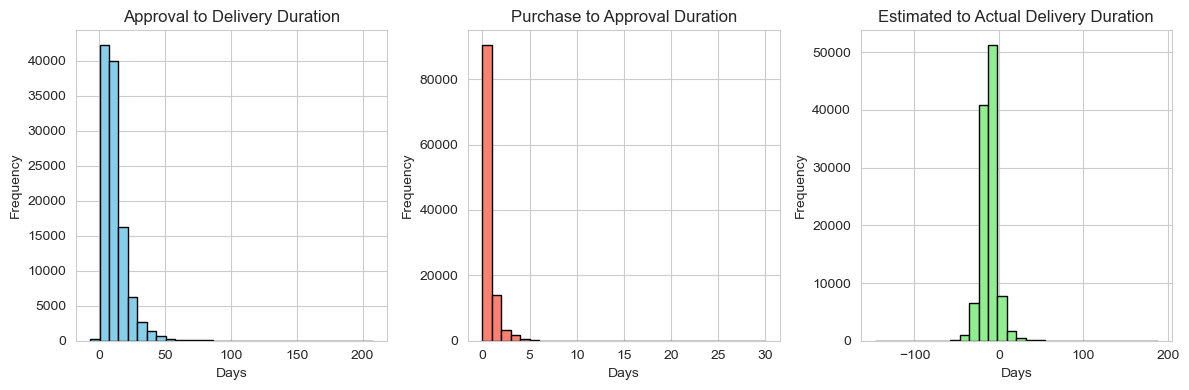

Average time from approval to delivery: 11.55 days
Average time from purchase to approval: 0.27 days
Average time from estimated to actual delivery: -12.03 days


In [72]:
# Convert timestamp columns to datetime objects for time-based analysis
timestamp_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in timestamp_columns:
    df_merged[col] = pd.to_datetime(df_merged[col])

# Calculate time durations for different order processing stages
df_merged['approval_to_delivery'] = (df_merged['order_delivered_customer_date'] - df_merged['order_approved_at']).dt.days
df_merged['purchase_to_approval'] = (df_merged['order_approved_at'] - df_merged['order_purchase_timestamp']).dt.days
df_merged['estimated_to_actual_delivery'] = (df_merged['order_delivered_customer_date'] - df_merged['order_estimated_delivery_date']).dt.days

# Visualizations
plt.figure(figsize=(12, 4))

# Histogram for approval to delivery duration
plt.subplot(1, 3, 1)
plt.hist(df_merged['approval_to_delivery'], bins=30, color='skyblue', edgecolor='black')
plt.title('Approval to Delivery Duration')
plt.xlabel('Days')
plt.ylabel('Frequency')

# Histogram for purchase to approval duration
plt.subplot(1, 3, 2)
plt.hist(df_merged['purchase_to_approval'], bins=30, color='salmon', edgecolor='black')
plt.title('Purchase to Approval Duration')
plt.xlabel('Days')
plt.ylabel('Frequency')

# Histogram for estimated to actual delivery duration
plt.subplot(1, 3, 3)
plt.hist(df_merged['estimated_to_actual_delivery'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Estimated to Actual Delivery Duration')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Displaying results
avg_approval_to_delivery = df_merged['approval_to_delivery'].mean()
avg_purchase_to_approval = df_merged['purchase_to_approval'].mean()
avg_estimated_to_actual_delivery = df_merged['estimated_to_actual_delivery'].mean()

print(f"Average time from approval to delivery: {avg_approval_to_delivery:.2f} days")
print(f"Average time from purchase to approval: {avg_purchase_to_approval:.2f} days")
print(f"Average time from estimated to actual delivery: {avg_estimated_to_actual_delivery:.2f} days")


### 2.3 Sales Analysis

#### 2.3.1 Price distribution of the data

<Axes: xlabel='price', ylabel='Count'>

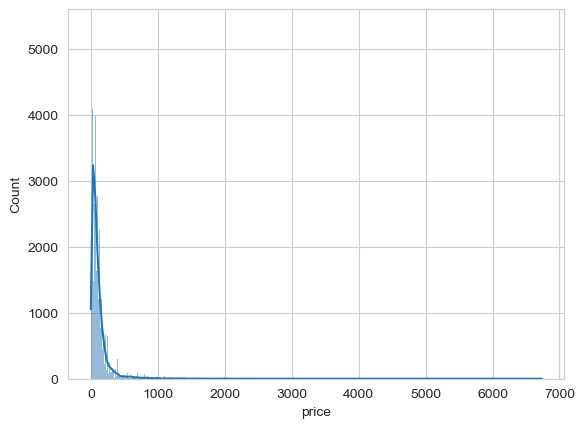

In [83]:
# Check the distribution of the data
sns.histplot(df_merged['price'], kde=True)

#### 2.3.2 Total Revenue by Customer State

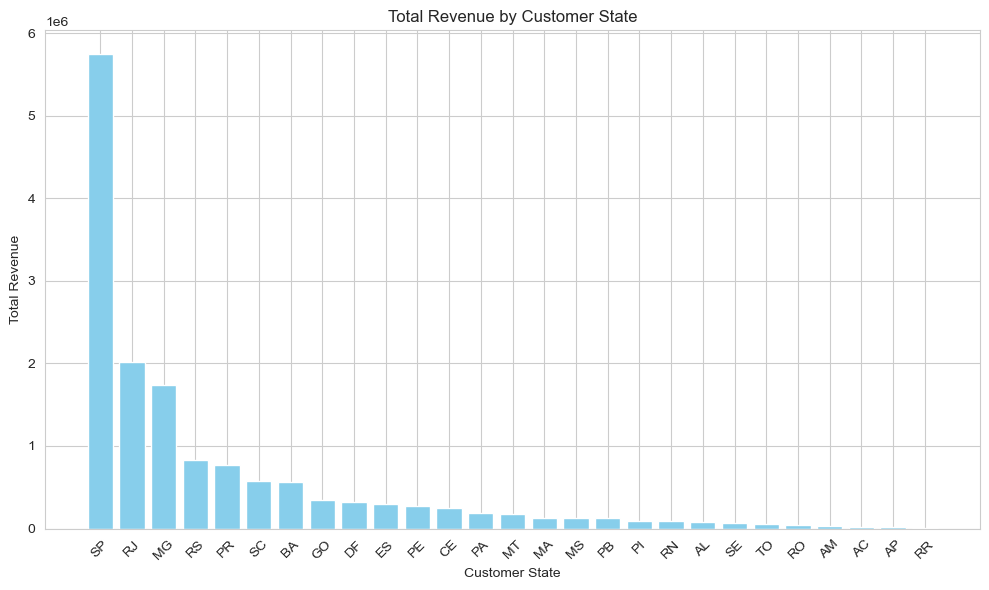

In [73]:
# Calculate revenue for each order
df_merged['revenue'] = df_merged['price'] * df_merged['order_item_id']

# Calculate total revenue per customer state
revenue_by_state = df_merged.groupby('customer_state')['revenue'].sum().reset_index()

# Sorting the data by revenue in descending order for better visualization
revenue_by_state = revenue_by_state.sort_values(by='revenue', ascending=False)

# Visualizing revenue by state
plt.figure(figsize=(10, 6))
plt.bar(revenue_by_state['customer_state'], revenue_by_state['revenue'], color='skyblue')
plt.title('Total Revenue by Customer State')
plt.xlabel('Customer State')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 2.3.3 Top Catagories in Each State

In [74]:
# Grouping data by customer_state and product_category_name
state_category_orders = df_merged.groupby(['customer_state', 'product_category_name']).size().reset_index(name='order_count')

# Displaying the top categories ordered by each state
for state in state_category_orders['customer_state'].unique():
    state_data = state_category_orders[state_category_orders['customer_state'] == state]
    top_categories = state_data.sort_values(by='order_count', ascending=False).head(3)  # Display top 3 categories per state
    print(f"Top categories ordered in {state}:")
    print(top_categories)
    print("\n")


Top categories ordered in AC:
   customer_state product_category_name  order_count
10             AC  decoration_furniture           12
24             AC         sport_leisure            9
7              AC  computer_accessories            8


Top categories ordered in AL:
   customer_state product_category_name  order_count
36             AL         beauty_health           62
39             AL  computer_accessories           39
68             AL         watches_gifts           35


Top categories ordered in AM:
   customer_state product_category_name  order_count
78             AM         beauty_health           20
80             AM  computer_accessories           16
71             AM         Mobile_Phones           15


Top categories ordered in AP:
    customer_state product_category_name  order_count
110             AP         beauty_health           10
125             AP         watches_gifts            8
112             AP  computer_accessories            8


Top categories order

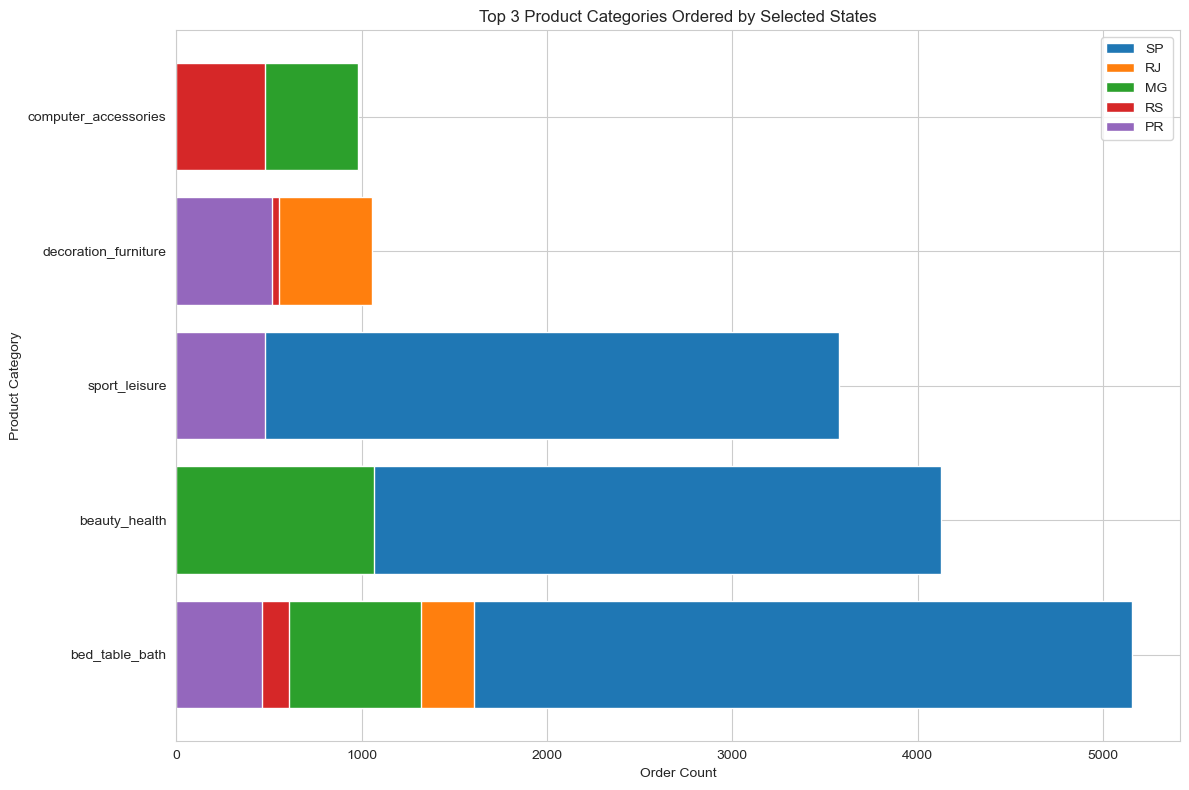

In [77]:
# Grouping data by customer_state and product_category_name
state_category_orders = df_merged.groupby(['customer_state', 'product_category_name']).size().reset_index(name='order_count')

# Filtering data for specific states: 'SP', 'RJ', 'MG', 'RS', 'PR'
selected_states = ['SP', 'RJ', 'MG', 'RS', 'PR']
state_category_orders_filtered = state_category_orders[state_category_orders['customer_state'].isin(selected_states)]

# Finding top 3 categories ordered by each state
top_categories_by_state = state_category_orders_filtered.groupby('customer_state').apply(lambda x: x.nlargest(3, 'order_count')).reset_index(drop=True)

# Plotting top categories in each state
plt.figure(figsize=(12, 8))

for state in selected_states:
    state_data = top_categories_by_state[top_categories_by_state['customer_state'] == state]
    plt.barh(state_data['product_category_name'], state_data['order_count'], label=state)

plt.xlabel('Order Count')
plt.ylabel('Product Category')
plt.title('Top 3 Product Categories Ordered by Selected States')
plt.legend()
plt.tight_layout()
plt.show()


Looks still complicated,let's make seperate charts for each states.

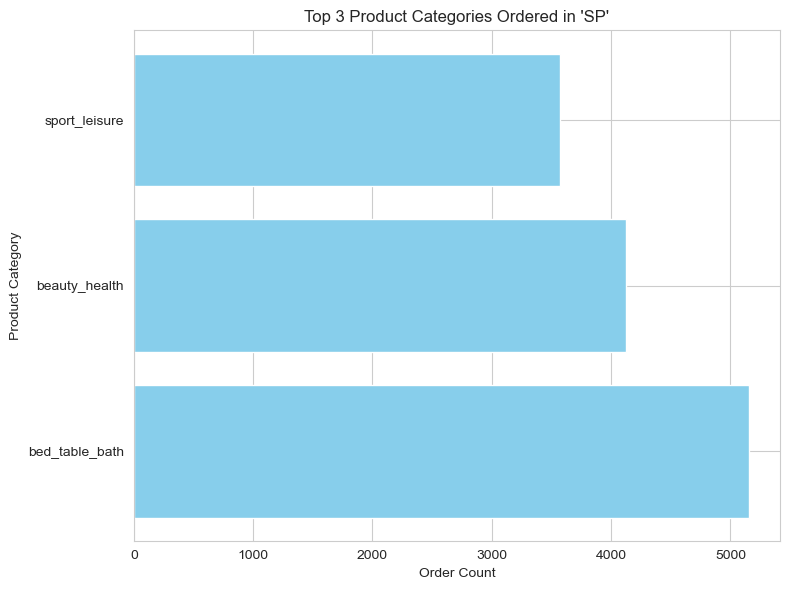

In [79]:
#Top 3 Product Categories Ordered in SP

# Grouping data by customer_state and product_category_name
state_category_orders = df_merged.groupby(['customer_state', 'product_category_name']).size().reset_index(name='order_count')

# Filtering data for state 'SP'
state_sp = state_category_orders[state_category_orders['customer_state'] == 'SP']

# Finding top 3 categories ordered in 'SP'
top_categories_sp = state_sp.nlargest(3, 'order_count')

# Plotting top categories in 'SP'
plt.figure(figsize=(8, 6))
plt.barh(top_categories_sp['product_category_name'], top_categories_sp['order_count'], color='skyblue')
plt.xlabel('Order Count')
plt.ylabel('Product Category')
plt.title("Top 3 Product Categories Ordered in 'SP'")
plt.tight_layout()
plt.show()


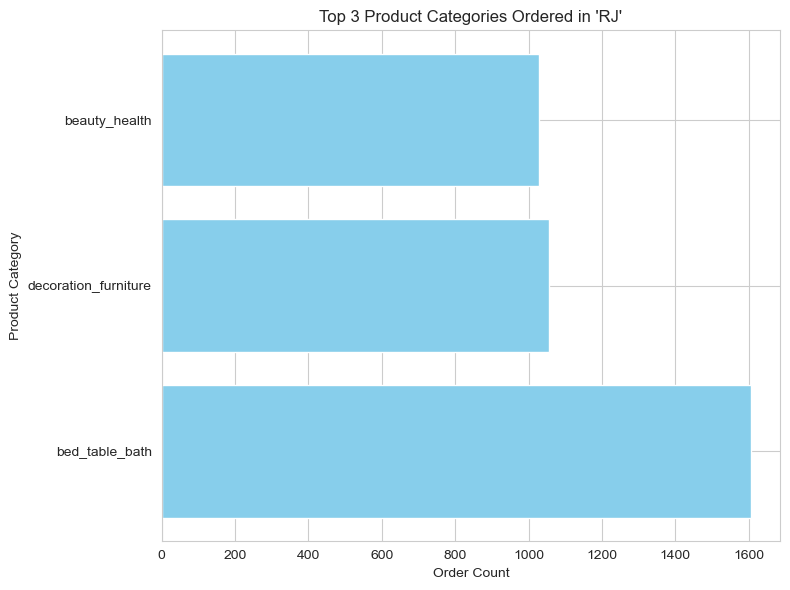

In [80]:
#Top 3 Product Categories Ordered in 'RJ
# Similar code as above, but filtering for state 'RJ'
state_rj = state_category_orders[state_category_orders['customer_state'] == 'RJ']
top_categories_rj = state_rj.nlargest(3, 'order_count')

plt.figure(figsize=(8, 6))
plt.barh(top_categories_rj['product_category_name'], top_categories_rj['order_count'], color='skyblue')
plt.xlabel('Order Count')
plt.ylabel('Product Category')
plt.title("Top 3 Product Categories Ordered in 'RJ'")
plt.tight_layout()
plt.show()


Let's Check What people buy in December for Christmas Gifts?

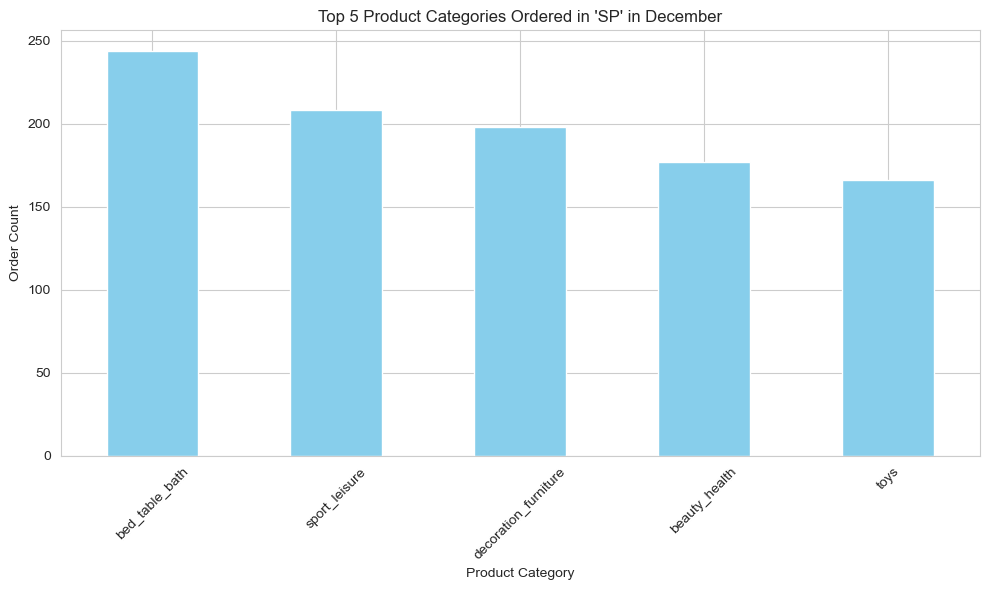

In [84]:
#"Top 5 Product Categories Ordered in 'SP' in December"
# Convert 'order_purchase_timestamp' to datetime
df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'])

# Filter data for state 'SP' and 'December' month
state_sp_december = df_merged[(df_merged['customer_state'] == 'SP') & (df_merged['order_purchase_timestamp'].dt.month == 12)]

# Grouping data by product_category_name
state_sp_december_categories = state_sp_december.groupby('product_category_name').size().nlargest(5)

# Plotting top categories in 'SP' for 'December'
plt.figure(figsize=(10, 6))
state_sp_december_categories.plot(kind='bar', color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Order Count')
plt.title("Top 5 Product Categories Ordered in 'SP' in December")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In terms of the order counts 'bed_table_bath' is the top catagory.I'd love to learn more and I would like to see total spendings.

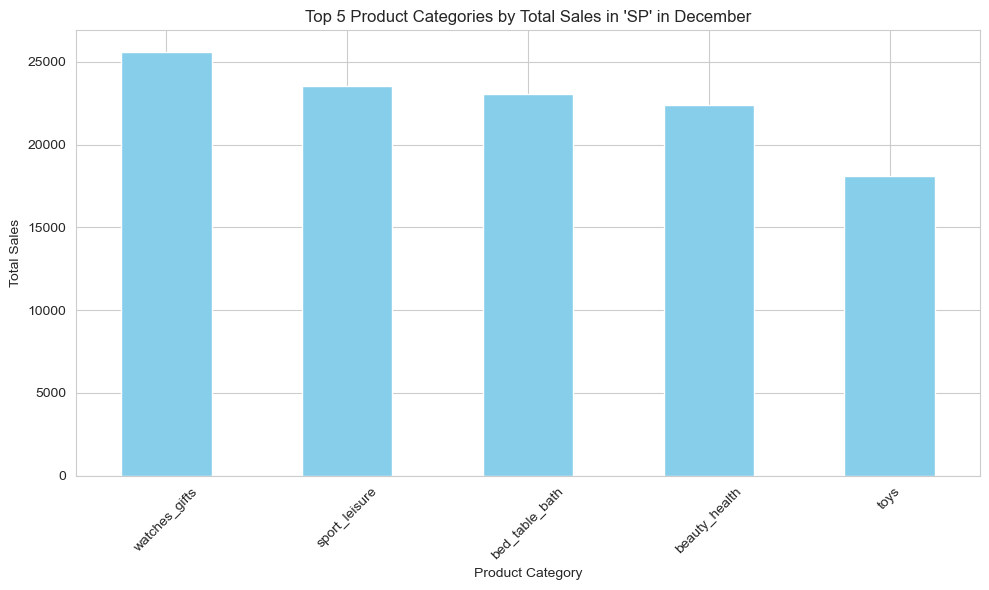

In [85]:
#"Top 5 Product Categories by Total Sales in 'SP' in December"
# Convert 'order_purchase_timestamp' to datetime
df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'])

# Filter data for state 'SP' and 'December' month
state_sp_december = df_merged[(df_merged['customer_state'] == 'SP') & (df_merged['order_purchase_timestamp'].dt.month == 12)]

# Grouping data by product_category_name and calculating total sales
state_sp_december_categories = state_sp_december.groupby('product_category_name')['price'].sum().nlargest(5)

# Plotting top categories in 'SP' for 'December' by total sales
plt.figure(figsize=(10, 6))
state_sp_december_categories.plot(kind='bar', color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title("Top 5 Product Categories by Total Sales in 'SP' in December")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Looks like People in SP love to buy some watches to loved ones in December!In total sales figures number one is changed!

#### 2.3.4 Revenue Trend Over Time

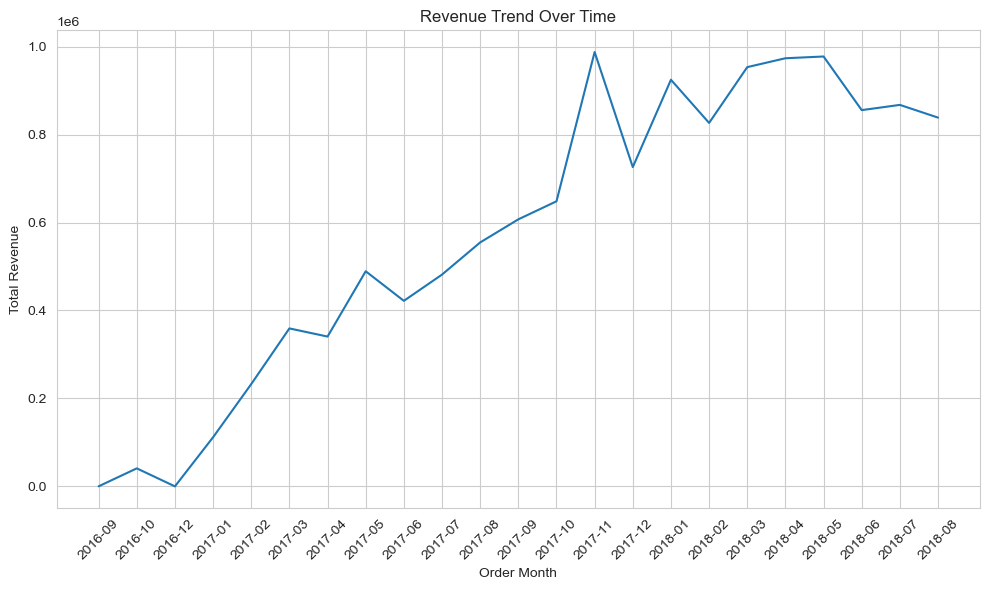

In [87]:

# Perform feature engineering to understand revenue growth
df_merged['order_month'] = pd.to_datetime(df_merged['order_purchase_timestamp']).dt.to_period('M').astype(str)

# Group the data by order month and calculate total revenue
df_revenue = df_merged.groupby('order_month')['price'].sum().reset_index()

# Plot the revenue over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_month', y='price', data=df_revenue)
plt.xlabel('Order Month')
plt.ylabel('Total Revenue')
plt.title('Revenue Trend Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


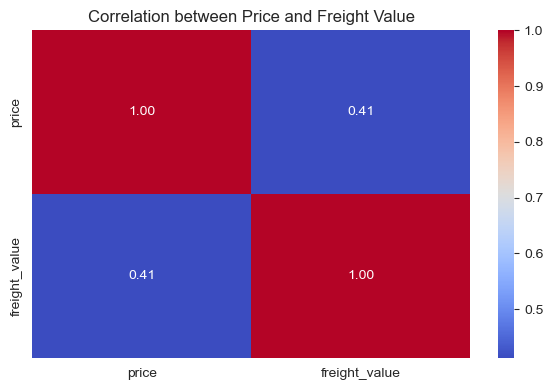

In [89]:
#Price and Freight Value

# Selecting the columns of interest
price_freight_corr = df_merged[['price', 'freight_value']]

# Calculating the correlation matrix
correlation_matrix = price_freight_corr.corr()

# Visualizing the correlation using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Price and Freight Value')
plt.tight_layout()
plt.show()


Price and Freight Value:Analyzing the correlation between these two variables can indicate if higher-priced items tend to have higher shipping costs.

### 3.Seller Performance Metrics

In [92]:
#Merge the two df's for seller performance

# Merge df_merged with review_df on 'order_id'
ana_reviewdf = pd.merge(df_merged, reviews_df, on='order_id', how='left')


In [94]:
ana_reviewdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110476 entries, 0 to 110475
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110476 non-null  object        
 1   customer_id                    110476 non-null  object        
 2   order_status                   110476 non-null  object        
 3   order_purchase_timestamp       110476 non-null  datetime64[ns]
 4   order_approved_at              110476 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110476 non-null  datetime64[ns]
 6   order_delivered_customer_date  110476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110476 non-null  datetime64[ns]
 8   order_item_id                  110476 non-null  int64         
 9   product_id                     110476 non-null  object        
 10  seller_id                      110476 non-null  object        
 11  

#### 3.1 Seller_id and Review Scores

In [98]:
# Group data by seller_id in review_df and calculate the average rating per seller
seller_avg_rating = ana_reviewdf.groupby('seller_id')['review_score'].mean().reset_index()

# Display the average rating per seller
print(seller_avg_rating)


                             seller_id  review_score
0     0015a82c2db000af6aaaf3ae2ecb0532      3.666667
1     001cca7ae9ae17fb1caed9dfb1094831      3.965368
2     002100f778ceb8431b7a1020ff7ab48f      4.037037
3     003554e2dce176b5555353e4f3555ac8      5.000000
4     004c9cd9d87a3c30c522c48c4fc07416      4.160494
...                                ...           ...
2965  ffc470761de7d0232558ba5e786e57b7      4.300000
2966  ffdd9f82b9a447f6f8d4b91554cc7dd3      4.250000
2967  ffeee66ac5d5a62fe688b9d26f83f534      4.214286
2968  fffd5413c0700ac820c7069d66d98c89      3.912281
2969  ffff564a4f9085cd26170f4732393726      3.250000

[2970 rows x 2 columns]


#### 3.2 Let's find the top 20 Sellers with 5.0 review Score 

In [100]:
# Sort the sellers by average rating in descending order
top_20_sellers = seller_avg_rating.sort_values(by='review_score', ascending=False).head(20)

# Display the top 10 sellers with their ratings
print(top_20_sellers)


                             seller_id  review_score
1796  98dddbc4601dd4443ca174359b237166           5.0
838   48e5ee06fb2dc74df1c711a9b6dfac2a           5.0
369   2039c5e51785b5dde7cf93ccb3b7be2c           5.0
370   204b4e07bddef3c9b317f70189135b22           5.0
1570  84deb808079d1be601c209c1e771b1cc           5.0
840   48efc9d94a9834137efd9ea76b065a38           5.0
373   2063dd1b9f568df1c16741ea7d3e6adb           5.0
374   2075d8cd4dd63ff12df0749a5866bb06           5.0
376   20a7efa9721046319bdde5d60b6b5365           5.0
1696  8fb67a334bacec338885b4e9e1708073           5.0
836   48b6c3f4c6a93171da04b75313f2130f           5.0
2476  d4f91e8be86b38da2ee35bc489645a9d           5.0
1572  850857dfac77488c307e2b1cbd84ab5a           5.0
2888  f8e2c1b59cd4225a3e4fd0d013a76b93           5.0
1876  a08692680c77d30a0b4280da5df01c5a           5.0
830   483ca627d131e18f988349b1655c0acd           5.0
844   491a5ada3aa1678414e990262c4bbdc1           5.0
846   4965a7002cca77301c82d3f91b82e1a9        

looks like all 5.0 score lets find out how many seller has 5.0 score?

#### 3.3 The number of sellers with a perfect 5.0 review score is: 555

In [101]:
#How many seller with a perfect 5.0 review score? 

# Filter sellers with a perfect 5.0 review score
perfect_score_sellers = seller_avg_rating[seller_avg_rating['review_score'] == 5.0]

# Get the count of sellers with a perfect 5.0 review score
num_perfect_score_sellers = perfect_score_sellers.shape[0]

print(f"The number of sellers with a perfect 5.0 review score is: {num_perfect_score_sellers}")


The number of sellers with a perfect 5.0 review score is: 555


In [110]:
# Calculate the average number of orders per seller
average_orders_per_seller = ana_reviewdf['seller_id'].value_counts().mean()

# Count the number of sellers above the average
sellers_above_average = (ana_reviewdf['seller_id'].value_counts() > average_orders_per_seller).sum()

print(f"The number of sellers above the average number of orders per seller is: {sellers_above_average}")

The number of sellers above the average number of orders per seller is: 583


#### 3.4 Let's display the number of orders per seller and find out who is the king?

In [102]:
# Calculate the number of orders per seller
orders_per_seller = ana_reviewdf['seller_id'].value_counts().reset_index()
orders_per_seller.columns = ['seller_id', 'num_orders']

# Display the number of orders per seller
print(orders_per_seller)


                             seller_id  num_orders
0     6560211a19b47992c3666cc44a7e94c0        1999
1     4a3ca9315b744ce9f8e9374361493884        1963
2     1f50f920176fa81dab994f9023523100        1935
3     cc419e0650a3c5ba77189a1882b7556a        1734
4     da8622b14eb17ae2831f4ac5b9dab84a        1559
...                                ...         ...
2965  94165aea8a35c3c21499cbcae239b16c           1
2966  6a3139c7bf09ece22a4713d956acbe5e           1
2967  eb4a59a06b3948e851a7d7a830bcbc42           1
2968  b86a47b3366e3b5424a7b225781f4908           1
2969  f3862c2188522d89860c38a3ea8b550d           1

[2970 rows x 2 columns]


with 1999 orders winner is seller_id = 6560211a19b47992c3666cc44a7e94c0

#### 3.5 The most popular product category for seller 6560211a19b47992c3666cc44a7e94c0 is: watches_gifts

In [104]:

seller_id = '6560211a19b47992c3666cc44a7e94c0'

# Filter data for the specific seller
seller_data = ana_reviewdf[ana_reviewdf['seller_id'] == seller_id]

# Find the most popular product category for the seller
most_popular_category = seller_data['product_category_name'].mode().values[0]

print(f"The most popular product category for seller {seller_id} is: {most_popular_category}")


The most popular product category for seller 6560211a19b47992c3666cc44a7e94c0 is: watches_gifts


#### 3.6 Number of times seller 6560211a19b47992c3666cc44a7e94c0 sold below items in product category

In [105]:
seller_id = '6560211a19b47992c3666cc44a7e94c0'

# Filter data for the specific seller
seller_data = ana_reviewdf[ana_reviewdf['seller_id'] == seller_id]

# Count occurrences of product_category_name for the seller
category_counts = seller_data['product_category_name'].value_counts()

print(f"Number of times seller {seller_id} sold items in each product category:")
print(category_counts)


Number of times seller 6560211a19b47992c3666cc44a7e94c0 sold items in each product category:
watches_gifts                1598
fashion_bags_e_acessorios     337
audio                          32
perfumery                      13
computer_accessories           12
sport_leisure                   6
security_tools                  1
Name: product_category_name, dtype: int64


#### 3.7 Dear seller_id  6560211a19b47992c3666cc44a7e94c0 !    What is your avarage review_score?

In [108]:

seller_id = '6560211a19b47992c3666cc44a7e94c0'

# Filter data for the specific seller
seller_reviews = ana_reviewdf[ana_reviewdf['seller_id'] == seller_id]

# Calculate the average review score for the seller
average_review_score = seller_reviews['review_score'].mean()

print(f"The average review score for seller {seller_id} is: {average_review_score:.2f}")



The average review score for seller 6560211a19b47992c3666cc44a7e94c0 is: 3.95


#### 3.8 seller_id = '6560211a19b47992c3666cc44a7e94c0' analysis for 'review_creation_date' and 'review_answer'

C:\Users\erdio\AppData\Local\Temp\ipykernel_1700\1349357129.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seller_reviews['review_creation_date'] = pd.to_datetime(seller_reviews['review_creation_date'])
C:\Users\erdio\AppData\Local\Temp\ipykernel_1700\1349357129.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seller_reviews['review_answer_timestamp'] = pd.to_datetime(seller_reviews['review_answer_timestamp'])


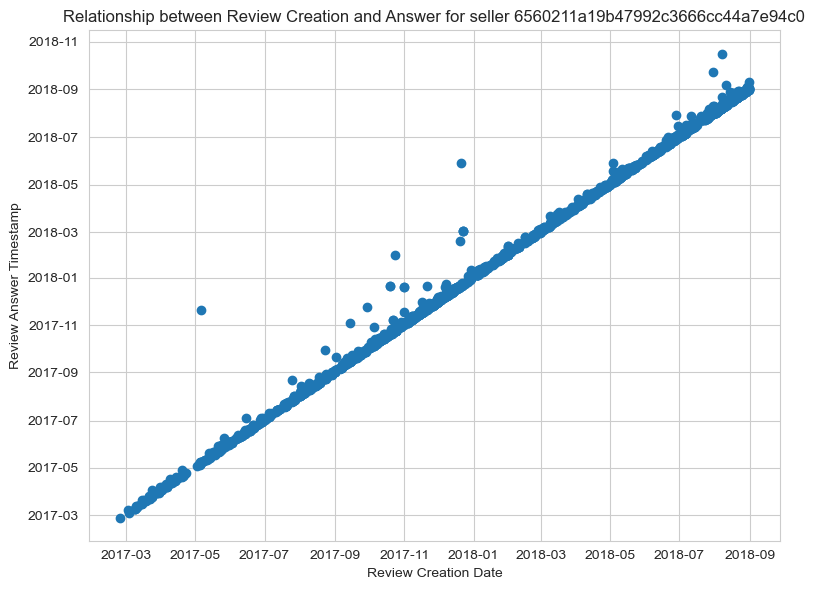

In [115]:


seller_id = '6560211a19b47992c3666cc44a7e94c0'

# Filter data for the specific seller
seller_reviews = ana_reviewdf[ana_reviewdf['seller_id'] == seller_id]

# Convert timestamp columns to datetime if not already
seller_reviews['review_creation_date'] = pd.to_datetime(seller_reviews['review_creation_date'])
seller_reviews['review_answer_timestamp'] = pd.to_datetime(seller_reviews['review_answer_timestamp'])

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(seller_reviews['review_creation_date'], seller_reviews['review_answer_timestamp'])
plt.xlabel('Review Creation Date')
plt.ylabel('Review Answer Timestamp')
plt.title(f'Relationship between Review Creation and Answer for seller {seller_id}')
plt.grid(True)
plt.tight_layout()
plt.show()
